###  Happy House 

#### Detecting if a Person is happy 

#### Import the necessary package

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dropout, MaxPool2D, Input, Flatten
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

#### 1 - The Happy House 

For your next vacation, you decided to spend a week with five of your friends from school. It is a very convenient house with many things to do nearby. But the most important benefit is that everybody has commited to be happy when they are in the house. So anyone wanting to enter the house must prove their current state of happiness.

<img src="images/happy-house.jpg" style="width:350px;height:270px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **the Happy House**</center></caption>


As a deep learning expert, to make sure the "Happy" rule is strictly applied, you are going to build an algorithm which that uses pictures from the front door camera to check if the person is happy or not. The door should open only if the person is happy. 

You have gathered pictures of your friends and yourself, taken by the front-door camera. The dataset is labbeled. 

<img src="images/house-members.png" style="width:550px;height:250px;">

Run the following code to normalize the dataset and learn about its shapes.


#### Load the dataset 

In [4]:
train_dataset = h5py.File('./dataset/happy_house/train_happy.h5')

train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #train set feature
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #train set label

test_dataset  = h5py.File('./dataset/happy_house/test_happy.h5')

test_set_x_orig  = np.array(test_dataset["test_set_x"][:])  #test set feature
test_set_y_orig  = np.array(test_dataset["test_set_y"][:])  #test set label

####  View the data

(<matplotlib.image.AxesImage at 0x7fb8921d0d30>, 1)

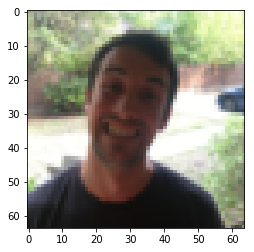

In [6]:
#happy person
index = 5
plt.imshow(train_set_x_orig[index]), train_set_y_orig[index]

(<matplotlib.image.AxesImage at 0x7fb892076470>, 0)

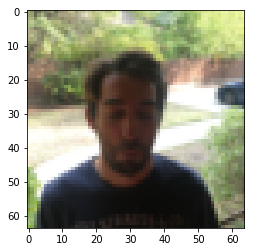

In [9]:
#sad person
index = 6
plt.imshow(train_set_x_orig[index]), train_set_y_orig[index]

In [11]:
#View the size ot the train and test dataset

print("Training dataset size is ", str(train_set_x_orig.shape), str(train_set_y_orig.shape))
print("Test dataset size is ", str(test_set_x_orig.shape), str(test_set_y_orig.shape))

Training dataset size is  (600, 64, 64, 3) (600,)
Test dataset size is  (150, 64, 64, 3) (150,)


#### preprocess the image

In [12]:
#normalize the dataset 
train_x = train_set_x_orig / 255
test_x  = test_set_x_orig  / 255

#### Select the model type

In [31]:
model = Sequential()

#### choose model structure

In [32]:
model.add(Conv2D(8,(3,3), padding='same', activation='relu', input_shape = (64,64,3)))
model.add(Conv2D(16,(3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2),strides=(2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2),strides=(2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2),strides=(2,2)))

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))

In [33]:
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))          

In [34]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 64, 64, 8)         224       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 32)          0         
__________

#### Complie the model

In [35]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#### Train the model by model.fit

In [36]:
model.fit(train_x,train_set_y_orig,epochs=20,batch_size=64)

Epoch 1/20
600/600 [==============================] - 46s 77ms/step - loss: 0.6986 - acc: 0.4833
Epoch 2/20
600/600 [==============================] - 43s 72ms/step - loss: 0.6932 - acc: 0.5000
Epoch 3/20
600/600 [==============================] - 44s 73ms/step - loss: 0.6925 - acc: 0.5317
Epoch 4/20
600/600 [==============================] - 45s 75ms/step - loss: 0.6845 - acc: 0.5400
Epoch 5/20
600/600 [==============================] - 47s 78ms/step - loss: 0.6651 - acc: 0.6050
Epoch 6/20
600/600 [==============================] - 44s 73ms/step - loss: 0.5990 - acc: 0.6717
Epoch 7/20
600/600 [==============================] - 43s 72ms/step - loss: 0.5764 - acc: 0.7133
Epoch 8/20
600/600 [==============================] - 44s 73ms/step - loss: 0.4120 - acc: 0.8033
Epoch 9/20
600/600 [==============================] - 43s 72ms/step - loss: 0.3481 - acc: 0.8500
Epoch 10/20
600/600 [==============================] - 45s 75ms/step - loss: 0.3094 - acc: 0.8750
Epoch 11/20
600/600 [========

In [37]:
model.fit(train_x,train_set_y_orig,epochs=5,batch_size=128)

Epoch 1/5
600/600 [==============================] - 50s 83ms/step - loss: 0.1016 - acc: 0.9650
Epoch 2/5
600/600 [==============================] - 44s 74ms/step - loss: 0.0570 - acc: 0.9817
Epoch 3/5
600/600 [==============================] - 44s 74ms/step - loss: 0.0778 - acc: 0.9667
Epoch 4/5
600/600 [==============================] - 44s 74ms/step - loss: 0.0715 - acc: 0.9767
Epoch 5/5
600/600 [==============================] - 44s 73ms/step - loss: 0.1528 - acc: 0.9400


#### Check the teting error

In [38]:
model.evaluate(test_x,test_set_y_orig,batch_size=64)

150/150 [==============================] - 7s 45ms/step


[0.12505450745423635, 0.9599999976158142]

#### Comment about happy_house model
Training accuracy is 94%, while testing accuracy is 95%. This model is underfitting, because training accuracy is not 100%. This can be increased by increase training parameter.


#### Test with your own image

In [49]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

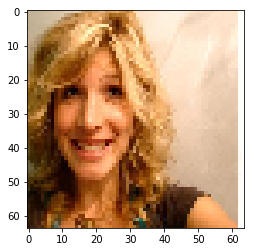

In [61]:
#load the image from the disk
img_path = 'images/happy.jpg'

happy = image.load_img(img_path, target_size=(64, 64))

plt.imshow(happy)

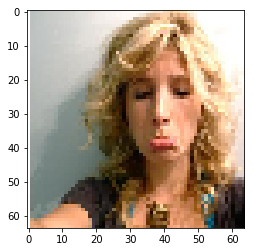

In [62]:
img_path = 'images/sad.jpg'

sad = image.load_img(img_path, target_size=(64,64))

plt.imshow(sad)

In [63]:
#preprocess image 
happy = image.img_to_array(happy)
happy = np.expand_dims(happy, axis=0)
happy = happy / 255

sad = image.img_to_array(sad)
sad = np.expand_dims(sad, axis=0)
sad = sad / 255


In [64]:
model.predict(happy), model.predict(sad)

(array([[0.6309315]], dtype=float32), array([[0.21569318]], dtype=float32))

####  64% confident that happy image is correctly predict happy while 80% confident that sad image is correctly predict sad image.